In [1]:
from pyevolve import G2DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Crossovers
from pyevolve import Mutators, Scaling
from random import seed, randint, random, uniform

In [2]:
def eval_polynomial(x,y, *coefficients):
    result = 0
    for exponent, coeff in enumerate(coefficients):
        res = 0
        for exp, coe in enumerate(coeff):
            res += coe*x**exp
        result += res*y**exponent
    return result

In [3]:
def generate_fitness_function(sample_points):
    def fitness_function(chromosome):
        score = 0
        for point in sample_points:
            delta = abs(eval_polynomial(point[0],point[1], *chromosome) - point[2])
            score += delta
        score = -score
        return score
    return fitness_function

In [4]:
    seed()

    source_polynomial = [[2,3,4],[5,6,7]] #2+3x+4x**2 + y*(5+6x+7x**2) + y**2*()... 

    sample_points = []
    for i in xrange(100):
        x=randint(-10,10)
        y=randint(-10,10)
        sample_points.append((x,y, eval_polynomial(x,y, *source_polynomial)))    
    print("Source polynomial: " + repr(source_polynomial))
    print("Sample points: " + repr(sample_points))

Source polynomial: [[2, 3, 4], [5, 6, 7]]
Sample points: [(-4, 8, 798), (-1, -3, -15), (-3, 10, 529), (1, -1, -9), (-4, 1, 147), (-3, 9, 479), (-6, -8, -1640), (8, 4, 2286), (-4, 10, 984), (10, 10, 8082), (-6, -9, -1861), (5, 0, 117), (0, 6, 32), (6, -1, -129), (-6, -5, -977), (4, 7, 1065), (-1, 6, 39), (4, 10, 1488), (7, 5, 2169), (-1, -4, -21), (-4, -8, -690), (-4, 2, 240), (-1, -8, -45), (6, 6, 1922), (-1, 5, 33), (9, 4, 2857), (4, 4, 642), (6, 8, 2508), (8, -8, -3726), (4, -7, -909), (-3, -5, -221), (-9, -8, -3845), (-10, -1, -273), (-6, 2, 570), (5, 10, 2217), (-4, 0, 54), (10, -3, -1863), (-2, 3, 75), (-3, 8, 429), (-10, -7, -4143), (-1, -8, -45), (-9, -3, -1255), (4, 9, 1347), (2, -10, -426), (-10, 6, 4242), (-1, 8, 51), (0, 0, 2), (-7, 3, 1095), (3, 3, 305), (-5, 8, 1287), (-6, 1, 349), (-4, 6, 612), (1, 8, 153), (10, 3, 2727), (-2, 0, 12), (-10, -1, -273), (8, -7, -3225), (3, 9, 821), (-6, -10, -2082), (-8, 3, 1449), (-9, -9, -4363), (3, -6, -469), (9, -6, -3403), (4, 3, 501),

In [5]:
    # Create the population
    genome = G2DList.G2DList(3,3)
    genome.evaluator.set(generate_fitness_function(sample_points))
    genome.setParams(rangemin=0, rangemax=10)

    # Set up the engine
    ga = GSimpleGA.GSimpleGA(genome)
    ga.setPopulationSize(1000)
    ga.selector.set(Selectors.GRouletteWheel)
    ga.mutator.set(Mutators.)

    # Change the scaling method
    pop = ga.getPopulation()
    pop.scaleMethod.set(Scaling.SigmaTruncScaling)

    # Start the algorithm, and print the results.
    ga.evolve(freq_stats=5)
    
    print(ga.bestIndividual())
    #print("Source polynomial: " + repr(source_polynomial))
    #print("Sample points: " + repr(sample_points))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [1223665.67(-25255.00)/91140.67(-1157780.00)/671197.97(-577722.70)]
Gen. 5 (5.00%): Max/Min/Avg Fitness(Raw) [370851.21(-5962.00)/0.00(-1122014.00)/242237.69(-142811.38)]
Gen. 10 (10.00%): Max/Min/Avg Fitness(Raw) [258561.51(-1443.00)/0.00(-1020643.00)/177958.21(-88452.90)]
Gen. 15 (15.00%): Max/Min/Avg Fitness(Raw) [259325.04(-557.00)/0.00(-1119195.00)/197298.56(-70172.05)]
Gen. 20 (20.00%): Max/Min/Avg Fitness(Raw) [219203.24(-557.00)/0.00(-1004452.00)/165872.25(-60127.53)]
Gen. 25 (25.00%): Max/Min/Avg Fitness(Raw) [270959.89(-557.00)/0.00(-1112700.00)/223513.28(-57376.69)]
Gen. 30 (30.00%): Max/Min/Avg Fitness(Raw) [266275.51(-557.00)/0.00(-1015227.00)/217505.81(-58524.36)]
Gen. 35 (35.00%): Max/Min/Avg Fitness(Raw) [250466.79(-533.00)/0.00(-1113027.00)/209528.59(-50391.01)]
Gen. 40 (40.00%): Max/Min/Avg Fitness(Raw) [224731.62(-533.00)/0.00(-1021584.00)/185016.70(-47557.75)]
Gen. 45 (45.00%): Max/Min/Avg Fitness(Raw) [245611.57(-533.00)/0.0

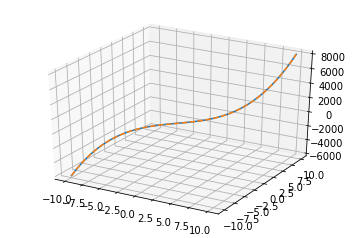

In [7]:
def f1(x,y):
    return 2+3*x+4*x**2 + y*(5+6*x+7*x**2)
def f2(x,y):
    return 2*x+4*x**2 + y*(5+6*x+7*x**2)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')

#t1 = np.arange(-10.0,10.0,0.1)
#t2 = np.arange(-10.0,10.0,0.1)

t1 = np.linspace(-10, 10, 50)
t2 = np.linspace(-10, 10, 50)

ax.plot3D(t1, t2, f1(t1,t2), '-')
ax.plot3D(t1, t2, f2(t1,t2), '--')

plt.show()

In [9]:
print(len(t1))

30
